{'101': 81, '011': 4, '000': 1, '001': 5, '110': 2, '100': 4, '010': 1, '111': 2}


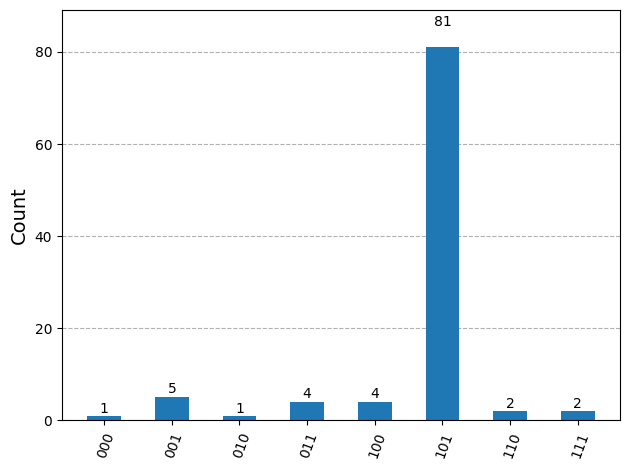

In [ ]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
import matplotlib.pyplot as plt
%matplotlib inline


#for 101
oracle=QuantumCircuit(3,name="oracle")
oracle.x(1)
oracle.ccz(0,1,2)
oracle.x(1)

oracle.to_gate()
# oracle.draw()

diffusion=QuantumCircuit(3,name="diffusion")
diffusion.h([0,1,2])
diffusion.x([0,1,2])
diffusion.ccz(0,1,2)
diffusion.x([0,1,2])
diffusion.h([0,1,2])
diffusion.to_gate()

backend=Aer.get_backend("qasm_simulator")
grover_circuit=QuantumCircuit(3,3)
grover_circuit.h([0,1,2])
grover_circuit.append(oracle,[0,1,2])
grover_circuit.append(diffusion,[0,1,2])

grover_circuit.measure([0,1,2],[0,1,2])
transpiled_circuit=transpile(grover_circuit,backend)
job=backend.run(transpiled_circuit,shots=100)

count=job.result().get_counts()
print(count)
plot_histogram(count)
plt.show()
